In [1]:
# 많은 경우 구현의 상세 사항을 실제로 알아야 할 필요는 없다.
# 하지만 어떻게 작동하는지 잘 이해하고 있으면 적절한 모델, 올바른 훈련 알고리즘, 작업에 맞는 좋은 하이퍼파라미터를 빠르게 찾을 수 있다.
# 또한 작동 원리를 이해하고 있으면 디버깅이나 에러를 효율적으로 분석하는데 도움이 된다.
# 선형회귀와 관련된 알고리즘(Logistic Regression, SoftMax Regression까지)들은 신경망을 이해하고 구축하는데 필수적인 내용이다.

# cf. sklearn에 있는 linear 모듈은 기본적으로 two dimension만 들어간다.

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings(action='ignore')
%matplotlib inline

#### 공부 전 참고
> np.random.randint(x,y)
 : x~y 사이의 임의의 수 한 개 추출
 
> np.random.rand(x,y)
 : 0~1사이값들을 균일분포 난수를 x*y matrix로 생성
 
> np.random.randn(x,y)
 : 평균이0, 표준편차가1 인 표준정규분포 난수를 x*y matrix로 생성

In [3]:
x = np.random.randint(10,20)
x

13

(array([106., 125., 107., 102., 105.,  93.,  79., 111.,  89.,  83.]),
 array([0.00327454, 0.10285902, 0.20244349, 0.30202797, 0.40161245,
        0.50119693, 0.60078141, 0.70036588, 0.79995036, 0.89953484,
        0.99911932]),
 <BarContainer object of 10 artists>)

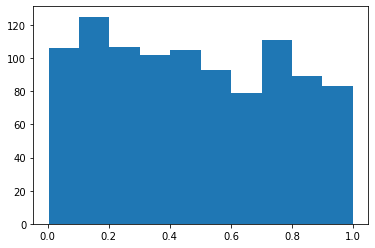

In [4]:
x = np.linspace(0,1,1000)
y = np.random.rand(1000,1)
plt.hist(y)

In [5]:
y.shape

(1000, 1)

(array([4.0000e+00, 1.9600e+02, 2.0370e+03, 1.0716e+04, 2.6863e+04,
        3.3278e+04, 2.0043e+04, 5.9160e+03, 8.8200e+02, 6.5000e+01]),
 array([-4.61750991, -3.74672464, -2.87593936, -2.00515408, -1.13436881,
        -0.26358353,  0.60720175,  1.47798703,  2.3487723 ,  3.21955758,
         4.09034286]),
 <BarContainer object of 10 artists>)

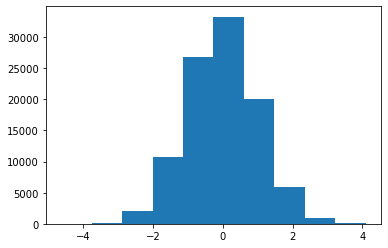

In [6]:
x = np.linspace(-10,10,100)
y = np.random.randn(100000,)
plt.hist(y)

# 4-1 선형회귀

In [7]:
# 일반적으로 선형모델은 입력 특성의 가중치 합과 편향(=절편)이라는 상수를 더해 예측을 만든다
# 가설함수 h(x) = w0 + w1*x1 + w2*x2 + ... + xnxn
# h(x)는 예측값, n은 특성 수, w는 특성의 가중치(모델 파라미터)이다.

# 회귀에서 가장 널리 사용되는 성능 지표는 평균 제곱근 오차(RMSE)이다.
#  == MSE가 최소가 되는 가중치 값을 찾아도 같다.

# 선형회귀 모델의 MSE 비용함수는 전체에 대한 제곱이다. 이는 convex function 를 뜻하며 미분을 했을 때 0이 나오면 이를 최솟값이라고 할 수 있다.
# 가중치 벡터들을 구하는 정규방정식은 inv(X.T.dot(X)).dot(X.T.dot(y))이다.
# X는 특성에 대한 독립변수들의 벡터를 의미하고, y는 각 샘플들의 입력값에 대한 예측값 벡터이다.

In [8]:
import numpy as np
X = 2 * np.random.rand(100,1)
y = 4 + 3 * X + np.random.randn(100,1)

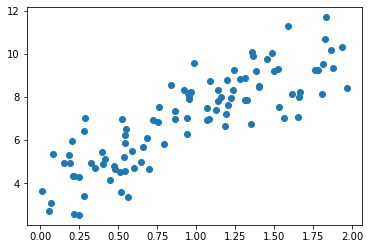

In [9]:
import matplotlib.pyplot as plt
plt.scatter(X,y)

In [10]:
X_b = np.c_[np.ones((100,1)),X]
theta_best = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)

In [11]:
theta_best

array([[3.81978519],
       [3.33618438]])

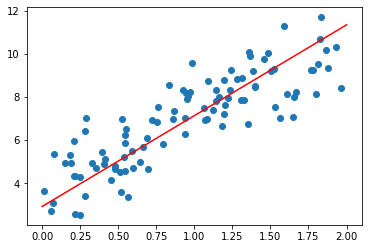

In [12]:
plt.scatter(X,y)
X_a = np.linspace(0,2,1000)
plt.plot(X_a,X_a * 4.2153 + 2.91784,c='r')

### 위 정규방정식을 따라 풀면 계수와 절편 값이 우리가 설정한 값과 비슷하게 나오는 것을 확인할 수 있다.
### 우리는 y에 대한 식을 y = 3x + 4 로 했는데 잡음으로 인해 정확하게 예측하진 못했지만 유사한 값을 얻었다

In [13]:
# 사이킷런에서 선형 회귀 실행
# 사이킷런에서 LinearRegression 은 계산을 할 때, 유사역행렬을 구한다.(역행렬이 없다면 작동하지않는 오류해결 또한 극단적인 경우도 처리할 수 있게 효율적인 방법이다)
from sklearn.linear_model import LinearRegression
LR = LinearRegression()
LR.fit(X,y)

LinearRegression()

In [14]:
print('X 계수 : ',LR.coef_)
print('y 절편 : ',LR.intercept_)

X 계수 :  [[3.33618438]]
y 절편 :  [3.81978519]


In [15]:
# x 변수가  1.523 값을 가진다면 이 선형모델은 8.65917을 예측하는 것을 확인할 수 있다.
ex1 = np.array([1.523])
LR.predict(ex1.reshape(-1,1))

array([[8.90079401]])

In [16]:
# 정규방정식은 O(n**2.4) ~ O(n**3) 사이의 계산 복잡도를 가진다.
# 사이킷런의 방식으로 계산하면 O(n**2) 의 계산 복잡도를 가진다.
# 특성의 개수가 늘어나면 효율적으로 처리 할 수 없다.
# 하지만 예측은 매우 빠르다.

# 4-2 경사 하강법(Gredient Descent)

In [17]:
# 여러종류의 문제에서 최적의 해법을 찾을 수 있는 일반적인 최적화 알고리즘이다.
# 경사하강법의 기본 아이디어는 비용 함수를 최소화 하기 위해 반복해서 파라미터를 조절해가는 것이다.

In [18]:
# 현재의 descent를 계산하고 우리가 정하게 되는 학습률에 따른 descent를 계산 한 후 감소하는 방향으로 진행한다.
# 기울기가 0이 되면 최솟값에 도달한다.
# 학습률은 하이퍼파리미터 값으로 정하게 되며, 적절한 값을 정하지 않으면 반대편으로 건너뛰어 발산하게 될 수 도 있다.
# 경사하강법의 개념은 선형모델에 맞춰진 것이 아니라 다양한 알고리즘에서 사용되는데, 적어도 선형 회귀를 위한 MSE 비용함수는 Convex 하기 때문에 지역최솟값에 수렴하는 일이 없다.(항상 전역최솟값)
# Gredient Descent 반드시 모든 특성이 같은 스케일을 갖도록 scaling이 필수

## 4-2-1 배치 경사 하강법

In [19]:
# 각 특성(feature)의 가중치에 대한 Gredient Descent 를 계산해야한다. 
# 각 가중치에 대한 편미분 식을 구한다.
# 배치 경사 하강법은 한번의 스텝에서 훈련 데이터 전체를 사용한다.
# 매우 큰 데이터에 대해 아주 느리다.
# 특성이 매우 많은 경우에는 유리한데, 정규방정식, SVD 분해보다 경사하강법이 훨씬 더 빠르다.

In [20]:
eta = 0.1
n_iterations = 1000
m = 100

theta = np.random.randn(2,1)

for iteration in range(n_iterations):
    gradients = 2/m * X_b.T.dot(X_b.dot(theta) - y)
    theta = theta - eta * gradients
theta

array([[3.81978519],
       [3.33618438]])

In [21]:
# 학습률이 너무 낮으면 최적점에 도달하는데 시간이 오래걸린다
# 학습률이 너무 크면 최적점을 넘어간 후 발산해 버린다.
# 경사 하강법의 반복횟수는 아주 크게 지정하고 벡터의 노름이 어떤 값(오차)보다 작아지면 최솟값에 도달한 것으로 가정하고 종료시키는 것이 좋다.

## 4-2-2 확률적 경사 하강법

In [22]:
# 배치 경사 하강법의 문제점은 전체 훈련 세트를 사용해 기울기를 계산한다는 것이다.(훈련 세트가 커지면 매우 느려지게 된다.)
# Stochastic Gredient Descent 는 매 스텝에서 한 개의 샘플을 무작위로 선택하고 그 하나의 샘플에 대한 그레디언트를 계산
# 알고리즘이 훨씬 빠르다. 하지만 확률적(무작위)이기 때문에 최솟값까지 부드럽게 감소하지않고 위아래로 요동치며 감소한다.
# 시간이 지나면 최솟값에 매우 근접하지만 이게 반드시 최적치는 아닐 수 있다.
# 최적치가 아닐 수 있는 것에 대한 딜레마의 해결법은 학습률을 점진적으로 감소시켜주는 것이다.
# 비용함수가 불안정할때 이 알고리즘은 지역최솟값을 건더뛰도록 도와줄 수 있다.

In [23]:
n_epochs = 50
t0, t1 = 5,50
m = 100

def learning_schedule(t):
    return t0 / (t + t1)

theta = np.random.randn(2,1)

for epochs in range(n_epochs):
    for i in range(m):
        random_index = np.random.randint(m)
        xi = X_b[random_index:random_index+1]
        yi = y[random_index:random_index+1]
        gradients = 2 * xi.T.dot(xi.dot(theta) - yi)
        eta = learning_schedule(epochs*m + i)
        theta = theta - eta * gradients
print(theta)

[[3.87213668]
 [3.33587546]]


In [24]:
from sklearn.linear_model import SGDRegressor
sgd = SGDRegressor(max_iter=1000,tol = 1e-3, penalty=None, eta0=0.1)
sgd.fit(X,y.ravel())

SGDRegressor(eta0=0.1, penalty=None)

In [25]:
sgd.coef_

array([3.37985464])

In [26]:
sgd.intercept_

array([3.86727211])

# 4-3 다항 회귀

In [27]:
# 우리는 경우에 따라 항상 직선의 형태를 띄는 linear model을 만들 수 없다.
# 예를 들어, 집세를 예측하는데 단순히 밑변과 높이에 대한 데이터에 대해 각각 linear model을 만드는 것보다 두 가지를 곱해 polynomial 회귀를 할 수 있다.
# sklearn 에서는 preprocessing.PolynomialFeatures로 지원하고 있다.

In [28]:
import numpy as np

In [29]:
def f(size):
    x = np.linspace(0,5,size)
    y = x * np.sin(x ** 2) + 1
    return (x,y)
# y = x * sin(x**2) + 1

def sample(size):
    x = np.linspace(0,5,size)
    y = x * np.sin(x **2) + 1 + np.random.randn(x.size) * 0.5
    return (x,y)

<function matplotlib.pyplot.show(close=None, block=None)>

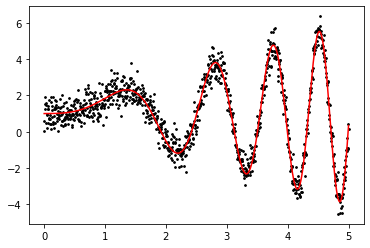

In [30]:
import matplotlib.pyplot as plt
f_x, f_y = f(1000)
plt.plot(f_x,f_y,c='r') # 선 긋기
X,y = sample(1000)
plt.scatter(X,y,s = 3,c = 'black') # X,y 그래프 랜덤으로 scatter plot 찍기
plt.show

In [31]:
X = X.reshape(-1,1)
y = y.reshape(-1,1)

In [32]:
from sklearn.linear_model import LinearRegression
LR = LinearRegression()
LR.fit(X,y)

LinearRegression()

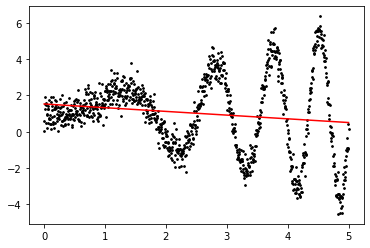

In [33]:
plt.scatter(X.flatten(),y.flatten(),s = 3,c = 'black') # X,y 그래프 랜덤으로 scatter plot 찍기
plt.plot(X.flatten(),LR.predict(X).flatten(), c = 'r')
plt.show()

In [34]:
from sklearn.preprocessing import PolynomialFeatures
pf = PolynomialFeatures(degree=2)
# 파라미터값은 degree와 interaction_only 두 개 조절
# 이것을 했을 경우 자동으로 절편항을 추가해주기 때문에 나중에 linear model에 적용시킬 때 fit_intercept = False로 해줘야한다.

In [35]:
X_poly = pf.fit_transform(X)
X_poly[:10]

array([[1.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [1.00000000e+00, 5.00500501e-03, 2.50500751e-05],
       [1.00000000e+00, 1.00100100e-02, 1.00200300e-04],
       [1.00000000e+00, 1.50150150e-02, 2.25450676e-04],
       [1.00000000e+00, 2.00200200e-02, 4.00801202e-04],
       [1.00000000e+00, 2.50250250e-02, 6.26251878e-04],
       [1.00000000e+00, 3.00300300e-02, 9.01802704e-04],
       [1.00000000e+00, 3.50350350e-02, 1.22745368e-03],
       [1.00000000e+00, 4.00400400e-02, 1.60320481e-03],
       [1.00000000e+00, 4.50450450e-02, 2.02905608e-03]])

In [36]:
LR = LinearRegression(fit_intercept=False)
LR.fit(X_poly,y)

LinearRegression(fit_intercept=False)

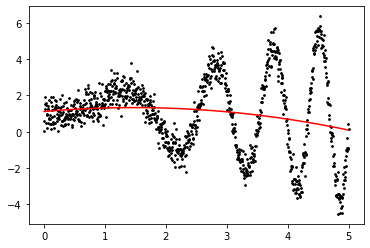

In [37]:
# X : 0~5까지 1000 등분한 각각의 값
# y : 위 X의 값들을 x * np.sin(x **2) + 1 + np.random.randn(x.size) * 0.5 식에 넣은 랜덤한 값
# X_poly : X값을 제곱한 값을 sklearn모듈을 통해 같은 차원의 배열에 추가한 값
# LR.predict(X_poly) : 제곱이 포함된 X_poly값들을 통해 그려진 Polynomial 식에서 예측된 값
plt.scatter(X.flatten(),y.flatten(),s = 3,c = 'black')
plt.plot(X.flatten(),LR.predict(X_poly).flatten(),c = 'r')

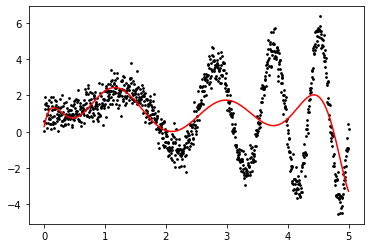

In [38]:
# 파라미터 search를 통해 실험적으로 알아가야함
pf = PolynomialFeatures(degree=9)
X_poly = pf.fit_transform(X)

lr = LinearRegression(fit_intercept=False)
lr.fit(X_poly,y)

plt.scatter(X,y,s = 3,c = 'black')
plt.plot(X.flatten(),lr.predict(X_poly).flatten(),c = 'r')

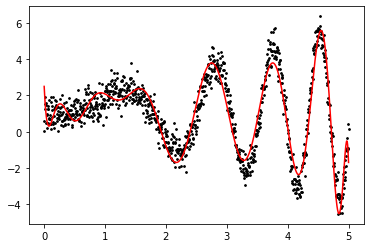

In [39]:
pf = PolynomialFeatures(degree=16)
X_poly = pf.fit_transform(X)

lr = LinearRegression(fit_intercept=False)
lr.fit(X_poly,y)

plt.scatter(X,y,s = 3,c = 'black')
plt.plot(X.flatten(),lr.predict(X_poly).flatten(),c = 'r')

In [40]:
def rmse(predictions,targets):
    return np.sqrt(((predictions - targets) ** 2). mean())

In [41]:
poly_range = list(range(10,50))
rmse_lr_list = []
rmse_lasso_list = []
rmse_ridge_list = []

from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge

for poly_value in poly_range:
    poly_features = PolynomialFeatures(degree= poly_value)
    X_poly = poly_features.fit_transform(X)
    lr = LinearRegression(fit_intercept=False)
    lr.fit(X_poly,y)
    
    rmse_lr_list.append(rmse(lr.predict(X_poly),y))
    
    lasso = Lasso(fit_intercept=False)
    lasso.fit(X_poly,y)
    rmse_lasso_list.append(rmse(lasso.predict(X_poly),y))
    
    ridge = Ridge(fit_intercept=False)
    ridge.fit(X_poly,y)
    rmse_ridge_list.append(rmse(ridge.predict(X_poly),y))

In [42]:
data = {'lr_rmse':rmse_lr_list,'lasso_rmse':rmse_lasso_list,'ridge_rmse':rmse_ridge_list}
data = pd.DataFrame(data,index = poly_range)
data.min()

lr_rmse       0.532004
lasso_rmse    2.262609
ridge_rmse    0.513332
dtype: float64

In [43]:
data['ridge_rmse'].sort_values().head()

23    0.513332
22    0.516049
21    0.613146
20    0.752470
19    0.761888
Name: ridge_rmse, dtype: float64

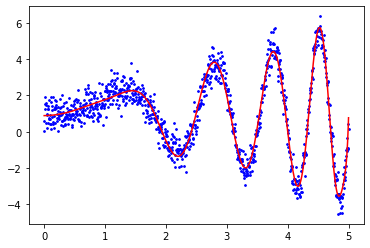

In [44]:
from sklearn.linear_model import Ridge
ridge = Ridge(fit_intercept=False)
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(degree=22)
X_poly = poly.fit_transform(X)
ridge.fit(X_poly,y)
plt.plot(X.flatten(),ridge.predict(X_poly), c = 'r')
plt.scatter(X,y,s = 3, c = 'b')

In [45]:
## 언제 사용하는가?
# 한 개의 변수가 y값과 비선형적인 관계가 있다고 의심
# 주기적인 패턴을 보일 때
# 하지만 모델 자체가 복잡해지면 해결 가능한 부분이 많다 > SVM, Tree-based models
# feature들을 제거할 때 실험적으로 하기 위해 할 수 있음

# 4-4 선형모델의 규제

## 4-4-1 릿지회귀

In [46]:
# 선형모델에서 가중치의 값들에 대한 규제를 가하는 방식이다.
# Norm2(유클리디안 거리)를 이용하여 규제를 가하게 되며, 기존 선형방정식의 비용함수 끝에 규제식을 붙인다.
# 릿지회귀는 스케일에 민감하기 때문에 수행하기 전에 데이터의 스케일을 맞추는 것이 중요하다
# 릿지 회귀를 사용하게 되면 Alpha(사용자가 입력하는 하이퍼 파라미터 값)를 이용해 가중치를 0에 가깝게 만들어준다.

In [114]:
from  sklearn.linear_model import Ridge
ridge_reg = Ridge(alpha=1,solver='cholesky')
ridge_reg.fit(X,y)
ridge_reg.predict([[1.5]])

array([[1.22081082]])

In [172]:
from sklearn.linear_model import SGDRegressor
sgd = SGDRegressor(alpha=1,penalty= 'l2')
sgd.fit(X,y)
sgd.predict([[1.5]])

array([1.12464036])

## 4-4-2 라쏘회귀

In [51]:
# 선형모델에서 가중치의 값들에 대한 규제를 가하는 방식이다.
# Norm1(맨해튼 거리)를 이용하여 규제를 가하게 되며, 기존 선형방정식의 비용함수 끝에 규제식을 붙인다.
# 라쏘회귀는 릿지회귀와 다르게 중요하다고 판단되지않는 특성에 대해서 가중치 값을 0으로 만들어 해당 특성을 지워버린다.
# 라쏘 회귀를 사용하게 되면 Alpha(사용자가 입력하는 하이퍼 파라미터 값)를 이용해 가중치를 0으로 만들거나, 규제를 가한다.

In [182]:
from  sklearn.linear_model import Lasso
lasso_reg = Lasso(alpha=0.1)
lasso_reg.fit(X,y)
lasso_reg.predict([[1.5]])

array([1.17300452])

In [212]:
from sklearn.linear_model import SGDRegressor
sgd = SGDRegressor(alpha=1,penalty= 'l1')
sgd.fit(X,y)
sgd.predict([[1.5]])

array([1.00100189])

## 4-4-3 엘라스틱넷

In [215]:
# 릿지회귀와 라쏘 화귀를 절충한 모델이다.
# 혼합 정도는 혼합 비율 r을 이용해 조절한다.
# 특성 수가 훈련 샘플 수 보다가 많거나 특성 몇 개가 강하게 연관되어 있을 때는 보통 라쏘가 문제를 일으키므로 라쏘보다는 엘라스틱넷을 선호한다.
# sklearn 에서는 l1.ratio = 파라미터를 이용해 조잘한다.

In [216]:
from sklearn.linear_model import ElasticNet
en = ElasticNet(alpha=0.1,l1_ratio=0.5)
en.fit(X,y)
en.predict([[1.5]])

array([1.19273884])

# 4-5 조기 종료

In [217]:
# 반복적인 학습 알고리즘(GD와 같은)을 규제하는 아주 색다른 방싱은 검증 에러가 최솟값에 도달하면 바로 훈련을 중지시키는 것이다.
# 이를 조기종료라고 하며 과대적합하지 않게 도와준다.

# 4-6 로지스틱 회귀

In [264]:
# 로지스틱 회귀는 True or False, 0 or 1과 같은 이진분류를 위한 분류기 이다.
# 오즈함수는 일어날 확률(P)를 일어나지않을 확률(1-P)로 나눈 값이고, 여기에 양변에 ln을 취하게 되면 이를 로짓함수라고 한다.
# 로짓함수의 역함수를 하게 되면 어떤 값을 넣었을 때 0~1 사이의 확률 값을 알 수 있는 S모양의 Sigmoid Function 이 나온다.
# 이 sigmoid Function의 x값에 우리는 선형모델 식을 넣고, 이를 가설함수 H(x)로 한다. 값이 0.5보다 같거나 크면 1, 값이 0.5보다 작으면 0을 반환한다.
# 비용함수는 목표변수가 1일 때와 0일 때 두가지 경우가 있어 모두 넣은 식을 것을 가중치에 대해 미분해 구하게 된다. 
# 로지스틱 회귀 모형도 다른 선형 모델 처럼 l1, l2규제를 사용할 수 있다. default 값으로 l2를 지정(단, alpha값이 아니고 그 역수에 해당하는 c로 계산하기 때문에 값이 커질수록 규제가 줄어든다)

In [249]:
from sklearn import datasets
iris = datasets.load_iris()
X = iris['data'][:,3].reshape(-1,1)
y = (iris['target'] ==2).astype(np.int)

In [250]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()

In [251]:
lr.fit(X,y)

LogisticRegression()

In [259]:
y_proba

array([[9.99250016e-01, 7.49984089e-04],
       [9.99240201e-01, 7.59799387e-04],
       [9.99230257e-01, 7.69743043e-04],
       ...,
       [3.08374822e-03, 9.96916252e-01],
       [3.04400296e-03, 9.96955997e-01],
       [3.00476842e-03, 9.96995232e-01]])

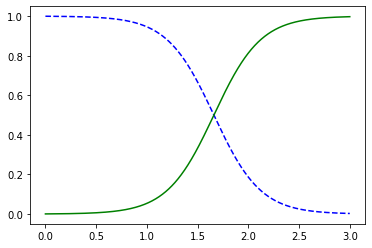

In [262]:
X_new = np.linspace(0,3,1000).reshape(-1,1)
y_proba = lr.predict_proba(X_new)
plt.plot(X_new,y_proba[:,0],'b--')
plt.plot(X_new,y_proba[:,1],'g-')

# 4-7 Softmax Regression


In [266]:
# 소프트맥스 회귀는 다항 로지스틱 회귀라고 볼 수 있다.
# 이진분류기인 로지스틱 회귀에서 가설함수를 sigmoid function을 사용하는 반면에, softmax는 소프트 맥스 함수를 사용하게 된다.
# A,B,C 분류를 하려고 할 때, 각각의 선형모델에 의한 값을 Ya, Yb, Yc이라고 가정. Y값들을 자연상수의 차수로 올려주고 이루 전체 e**Ya + e**Yb + e**Yc를 분모로 각각의 값들을 분자로 계산
# 위 식을 softmax regression의 가설함수라고 한다.
# cost function은 -(실제값*log(예측값)) 의 총합(Cross Entropy)이다.
# Gredient Descent를 이용해 가중치 값을 감소해가며 sklearn에서 규제는 default값으로 l2를 사용한다.

In [271]:
X = iris['data']
y = iris['target']

from sklearn.linear_model import LogisticRegression
softmax = LogisticRegression(multi_class='multinomial',solver='lbfgs',C=10)
softmax.fit(X,y)

LogisticRegression(C=10, multi_class='multinomial')

In [272]:
softmax.predict([[5,2,3,1]])

array([1])

In [273]:
softmax.predict_proba([[5,2,3,1]])

array([[4.35056196e-02, 9.56471225e-01, 2.31549380e-05]])